# Unit 5 - Financial Planning

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [7]:
from MCForecastTools import MCSimulation

In [8]:
%matplotlib inline 

In [9]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [11]:
# Set current amount of crypto assets
portfolio_btc = 1.2
portfolio_eth = 5.3 

In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18713700,
            "total_supply": 18713700,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39650.0,
                    "volume_24h": 103334802373,
                    "market_cap": 737428343267,
                    "percentage_change_1h": 0.964344279977285,
                    "percentage_change_24h": 0.356029808694757,
                    "percentage_change_7d": -20.7072786498589,
                    "percent_change_1h": 0.964344279977285,
                    "percent_change_24h": 0.356029808694757,
                    "percent_change_7d": -20.7072786498589
                },
                "CAD": {
                    "price": 47813.935,
                    "volume_24h": 124611438181.601,
                   

In [14]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = portfolio_btc * btc_value

# Fetch current ETH price

eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = portfolio_eth * eth_value


# Compute current value of my crpto


# Print current crypto wallet balance
print(f"The current value of your {portfolio_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {portfolio_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47580.00
The current value of your 5.3 ETH is $14539.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set current amount of shares
portfolio_agg = 200
portfolio_spy = 50

In [16]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-5-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Preview DataFrame
df_portfolio.index = df_portfolio.index.date
df_portfolio.head()

AGG                                       SPY                  \
              open    high       low   close   volume   open    high     low   
2021-05-14  114.22  114.28  114.1219  114.28  3711363  413.2  417.49  413.18   

                              
             close    volume  
2021-05-14  416.53  69027661

In [18]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [19]:
# Compute the current value of shares
my_agg_value = portfolio_agg * agg_close_price 
my_spy_value = portfolio_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {portfolio_spy} SPY holding is ${my_spy_value:0.2f}")
print(f"The current value of your {portfolio_agg} AGG holding is ${my_agg_value:0.2f}")

The current value of your 50 SPY holding is $20826.50
The current value of your 200 AGG holding is $22856.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}
# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'stocks'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,62119.967
stocks,43682.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

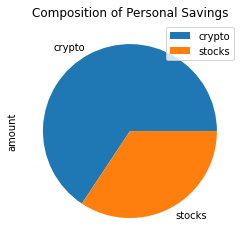

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund. maybe even a vacation!")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund. maybe even a vacation!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-16', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()


AGG                                        SPY            \
              open     high      low   close   volume    open      high   
2020-12-21  117.92  117.960  117.750  117.79  3645094  364.97  378.4600   
2020-12-22  117.88  117.980  117.825  117.96  2570686  368.21  368.3317   
2020-12-23  117.81  117.870  117.630  117.87  3972279  368.28  369.6200   
2020-12-24  117.94  118.046  117.925  118.01  1722930  368.08  369.0100   
2020-12-28  117.97  118.045  117.833  118.01  3503095  371.74  372.5900   

                                          
                 low     close    volume  
2020-12-21  362.0300  367.9300  73946581  
2020-12-22  366.0300  367.2200  41116443  
2020-12-23  367.2172  367.5300  37537811  
2020-12-24  367.4500  368.9899  21047937  
2020-12-28  371.0700  372.1400  31589494

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [25]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                     SPY  \
              open     high      low   close   volume daily_return    open   
2020-12-21  117.92  117.960  117.750  117.79  3645094          NaN  364.97   
2020-12-22  117.88  117.980  117.825  117.96  2570686     0.001443  368.21   
2020-12-23  117.81  117.870  117.630  117.87  3972279    -0.000763  368.28   
2020-12-24  117.94  118.046  117.925  118.01  1722930     0.001188  368.08   
2020-12-28  117.97  118.045  117.833  118.01  3503095     0.000000  371.74   

                                                                 
                high       low     close    volume daily_return  
2020-12-21  378.4600  362.0300  367.9300  73946581          NaN  
2020-12-22  368.3317  366.0300  367.2200  41116443    -0.001930  
2020-12-23  369.6200  367.2172  367.5300  37537811     0.000844  
2020-12-24  369.0100  367.4500  368.9899  21047937     0.003972  
2020-12-28  372.5900  371.0700  372.1400  31589494     0.008537

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994611,1.009409,1.001945,1.000318,1.004469,1.000460,0.995897,0.998094,1.000388,1.005067,...,0.989530,1.002456,0.994770,1.000950,0.993571,1.007098,0.997485,0.994276,1.002467,1.005550
2,0.993271,1.016429,1.007577,0.997894,1.003898,0.996142,1.000983,0.997214,1.004278,1.002073,...,0.991855,0.989637,0.997386,0.999394,0.994840,0.999456,1.008929,0.993400,0.994770,0.999957
3,0.998474,1.022000,1.005013,0.999521,1.010822,0.997792,1.005281,0.993720,1.004837,0.996574,...,0.992190,0.986778,0.999722,1.006932,0.993648,1.001913,1.006001,0.993599,0.991032,0.996917
4,1.001369,1.024790,1.005335,0.992896,1.017454,0.990707,0.998147,0.992643,1.002046,0.993380,...,1.005883,0.978723,0.997501,1.003869,0.995424,0.995348,1.007656,0.985871,0.994831,0.999156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,87.997899,149.172470,97.764608,101.280566,209.836144,117.871842,314.026200,381.944883,98.212073,98.236389,...,65.024799,178.644900,112.528908,298.747265,96.652204,117.200377,132.169398,73.881505,104.030767,126.080880
7557,88.315505,148.536228,97.891654,101.847381,207.708939,119.452083,314.368837,383.813044,98.104863,97.709540,...,65.183576,178.979706,112.517028,300.054379,96.746227,117.538395,133.758079,73.789200,103.398221,126.747911
7558,88.196122,148.384825,96.768997,102.167446,209.210760,119.704824,312.733517,384.420168,98.352819,97.539416,...,65.018717,179.246121,112.033558,298.421302,96.170531,117.440036,133.289179,73.008917,103.346196,127.013672
7559,88.610721,147.872718,96.847360,101.524219,210.098390,119.664176,314.888898,381.717662,98.478386,98.646241,...,64.876029,177.957342,111.830487,300.541689,96.774462,118.133491,133.321121,73.090563,103.254334,126.666495


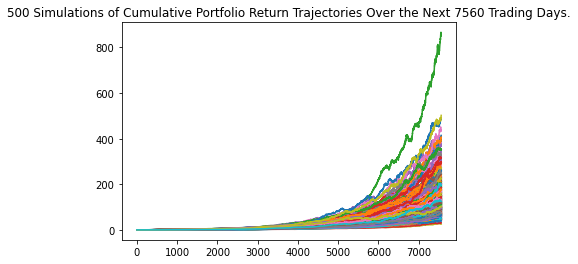

In [27]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

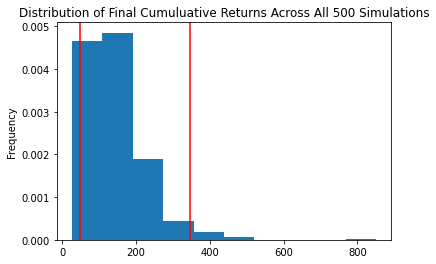

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            145.426092
std              81.555142
min              26.130442
25%              92.098160
50%             127.597009
75%             183.475343
max             850.784273
95% CI Lower     48.370897
95% CI Upper    345.900198
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $967417.94 and $6918003.97


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1451126.91 and $10377005.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                     SPY  \
              open     high      low   close   volume daily_return    open   
2020-12-21  117.92  117.960  117.750  117.79  3645094          NaN  364.97   
2020-12-22  117.88  117.980  117.825  117.96  2570686     0.001443  368.21   
2020-12-23  117.81  117.870  117.630  117.87  3972279    -0.000763  368.28   
2020-12-24  117.94  118.046  117.925  118.01  1722930     0.001188  368.08   
2020-12-28  117.97  118.045  117.833  118.01  3503095     0.000000  371.74   

                                                                 
                high       low     close    volume daily_return  
2020-12-21  378.4600  362.0300  367.9300  73946581          NaN  
2020-12-22  368.3317  366.0300  367.2200  41116443    -0.001930  
2020-12-23  369.6200  367.2172  367.5300  37537811     0.000844  
2020-12-24  369.0100  367.4500  368.9899  21047937     0.003972  
2020-12-28  372.5900  371.0700  372.1400  31589494     0.008537

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005816,1.005312,1.006042,1.002281,1.014561,0.996515,0.993143,1.010983,1.004015,1.003706,...,0.996680,1.008405,1.003178,1.010017,1.010327,1.000941,1.003511,0.999503,1.005541,1.010680
2,1.010402,1.007921,0.998095,1.006556,1.006877,0.998602,0.985045,1.008819,1.012365,1.007169,...,0.987480,1.005077,1.001761,1.014804,1.002531,1.003669,1.002070,1.003420,1.006144,1.009307
3,1.018003,0.998640,0.990052,1.018028,1.004664,1.005640,0.982759,1.018885,1.013021,1.009709,...,0.983488,1.003854,0.988765,1.021639,1.001745,0.993035,0.997592,1.004998,1.007362,1.013475
4,1.021350,0.995515,0.988741,1.015932,1.000789,0.998168,0.981413,1.012378,1.015637,1.004084,...,0.981876,1.002069,0.993134,1.022084,1.002547,0.999366,1.001884,1.000816,1.003066,1.008457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.099494,2.993940,2.525167,2.256551,1.666916,2.408835,2.270826,2.016425,2.366820,3.219932,...,2.243045,2.546391,2.448624,2.525629,1.968172,1.520960,2.726407,2.570333,1.994403,2.551506
1257,3.111806,3.034861,2.514588,2.248969,1.658111,2.388503,2.253018,2.013607,2.358087,3.238014,...,2.224164,2.597206,2.433849,2.530597,1.979734,1.528024,2.707756,2.580053,2.009052,2.565262
1258,3.111067,3.044416,2.510108,2.265988,1.668722,2.410654,2.258995,2.024171,2.351101,3.258349,...,2.225252,2.612995,2.416697,2.514240,1.965573,1.535491,2.694418,2.592515,2.025292,2.553538
1259,3.135481,3.032537,2.501262,2.259671,1.673666,2.413428,2.247423,2.037354,2.370754,3.262014,...,2.222211,2.607811,2.397423,2.516688,1.975262,1.544969,2.691291,2.586724,2.021165,2.561494


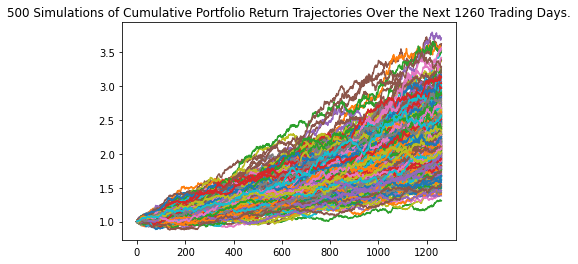

In [34]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

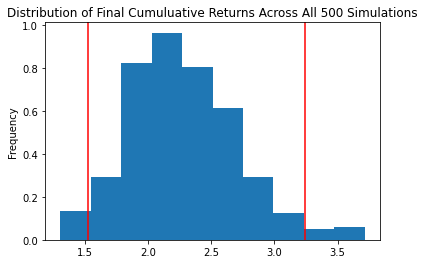

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.279553
std               0.424946
min               1.306606
25%               1.984152
50%               2.224346
75%               2.551868
max               3.715040
95% CI Lower      1.522872
95% CI Upper      3.245497
Name: 1260, dtype: float64


In [37]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $91372.29 and $194729.83


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                     SPY  \
              open     high      low   close   volume daily_return    open   
2020-12-21  117.92  117.960  117.750  117.79  3645094          NaN  364.97   
2020-12-22  117.88  117.980  117.825  117.96  2570686     0.001443  368.21   
2020-12-23  117.81  117.870  117.630  117.87  3972279    -0.000763  368.28   
2020-12-24  117.94  118.046  117.925  118.01  1722930     0.001188  368.08   
2020-12-28  117.97  118.045  117.833  118.01  3503095     0.000000  371.74   

                                                                 
                high       low     close    volume daily_return  
2020-12-21  378.4600  362.0300  367.9300  73946581          NaN  
2020-12-22  368.3317  366.0300  367.2200  41116443    -0.001930  
2020-12-23  369.6200  367.2172  367.5300  37537811     0.000844  
2020-12-24  369.0100  367.4500  368.9899  21047937     0.003972  
2020-12-28  372.5900  371.0700  372.1400  31589494     0.008537

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994397,0.998969,0.990766,1.006648,1.003416,1.000597,1.004645,1.005893,0.990502,0.999439,...,0.996089,0.994168,0.995505,1.007482,0.996573,1.004614,0.999602,1.004969,0.992654,1.004433
2,0.994878,0.995795,0.983563,1.000818,1.012488,1.000557,1.002380,1.001000,0.997768,0.997868,...,0.995897,0.998998,0.998064,1.012139,1.002202,1.005370,0.997178,1.006657,0.990026,1.010963
3,1.000750,0.994530,0.976577,1.000339,1.003169,1.005742,1.000366,1.013699,0.998361,0.994987,...,0.993060,1.006189,0.996074,1.013123,1.009262,1.010094,0.994302,1.005575,0.983120,1.009872
4,1.001859,0.987680,0.973733,1.002709,0.994755,1.000716,1.009022,1.011498,1.001250,0.993197,...,1.001390,1.017335,0.989724,1.018494,1.004467,1.004440,0.996330,1.013025,0.980083,1.006831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.298168,3.840848,6.549089,5.025910,4.368032,6.352850,4.538917,3.233376,3.977802,4.354135,...,3.865279,3.329247,5.194571,5.309432,4.344531,7.433013,3.343157,5.467365,4.231190,6.299653
2517,6.309301,3.790063,6.521532,5.034233,4.411513,6.364241,4.544517,3.247211,3.978299,4.356141,...,3.874425,3.354087,5.145611,5.337990,4.326905,7.459974,3.345276,5.436676,4.239341,6.265241
2518,6.337496,3.785449,6.497047,5.038944,4.435311,6.362085,4.545608,3.247435,4.005974,4.379353,...,3.850738,3.347727,5.114452,5.376068,4.364058,7.451603,3.367511,5.445102,4.237544,6.247192
2519,6.330658,3.823601,6.457895,5.030282,4.402817,6.333895,4.526909,3.263841,4.019176,4.362602,...,3.872324,3.386087,5.107158,5.391124,4.365730,7.428215,3.397078,5.413745,4.213108,6.234672


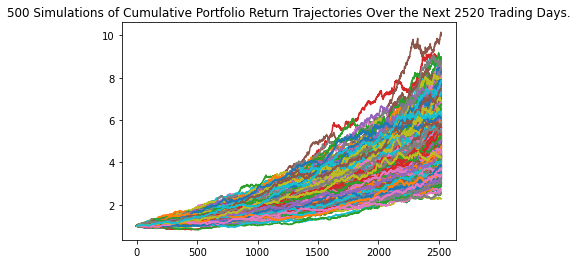

In [41]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

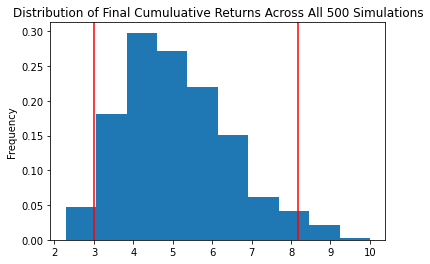

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              5.097824
std               1.350188
min               2.283912
25%               4.161668
50%               4.955337
75%               5.914149
max              10.003444
95% CI Lower      3.003435
95% CI Upper      8.171444
Name: 2520, dtype: float64


In [44]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $180206.09 and $490286.65
